<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup
import requests

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
##### Your Code Here #####
jobs_df = pd.read_csv('./data/job_listings.csv', usecols=['description', 'title'])
display(jobs_df.shape, jobs_df.head())

def cleanup_html(html_text):
    bs = BeautifulSoup(eval(html_text,{'__builtins__':None}).decode(), 'html.parser')    
    return bs.get_text().lower()

jobs_df['text_description'] = jobs_df.description.apply(cleanup_html)

display(jobs_df.shape, jobs_df.head())
display(jobs_df.text_description)


(426, 2)

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


(426, 3)

,description,title,text_description
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements:\nconceptual understanding in...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"job description\n\nas a data scientist 1, you ..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthcontractunder the gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location: usa – multiple locations\n2+ years o...


0      job requirements:\nconceptual understanding in...
1      job description\n\nas a data scientist 1, you ...
2      as a data scientist you will be working on con...
3      $4,969 - $6,756 a monthcontractunder the gener...
4      location: usa – multiple locations\n2+ years o...
                             ...                        
421    about us:\nwant to be part of a fantastic and ...
422    internshipat uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yeara million people a y...
424    senior data scientist\njob description\n\nabou...
425    cerner intelligence is a new, innovative organ...
Name: text_description, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

In [3]:
##### Your Code Here #####
from spacy import load as sp_load
from spacy.tokenizer import Tokenizer

nlp = sp_load('en_core_web_lg')

tokenizer = Tokenizer(nlp.vocab)

STOP_WORDS = ['\n','\n\n','\n ', '\n\n\n','new','aa','(e.g.', 'you’ll', "we're", 'we’re', 'etc.)', 'help','work',]

PUNCT = [':',',','/']

def tokenize(x):
    
    def check_token(t):
        if t[-1] in PUNCT:
            return t[:-1]
        elif t == 'datum':
            return 'data'
        else:
            return t
    
    doc = tokenizer(x)

    tokens = [check_token(token.lemma_).lower() for token in doc if (token.is_stop == False and token.is_punct == False and token.pos_ != 'PRON' and token.text not in STOP_WORDS )]

    return tokens

jobs_df['tokens'] = jobs_df.text_description.apply(tokenize)




In [4]:
from collections import Counter
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
jobs_df.tokens.apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
display(word_counts.most_common(50))

data = [' '.join(datum) for datum in jobs_df.tokens.to_list()]


[('data', 4111),
 ('experience', 1865),
 ('team', 1174),
 ('business', 1143),
 ('science', 918),
 ('model', 890),
 ('learn', 819),
 ('product', 756),
 ('analysis', 713),
 ('build', 699),
 ('machine', 677),
 ('analytics', 666),
 ('scientist', 617),
 ('statistical', 560),
 ('ability', 537),
 ('work', 526),
 ('opportunity', 525),
 ('include', 494),
 ('skill', 485),
 ('technology', 477),
 ('customer', 468),
 ('understand', 456),
 ('analytic', 444),
 ('solution', 441),
 ('develop', 425),
 ('year', 425),
 ('insight', 417),
 ('advance', 416),
 ('knowledge', 407),
 ('apply', 403),
 ('support', 402),
 ('problem', 398),
 ('drive', 394),
 ('development', 389),
 ('technical', 385),
 ('design', 378),
 ('company', 378),
 ('research', 375),
 ('strong', 374),
 ('degree', 369),
 ('provide', 356),
 ('tool', 349),
 ('large', 348),
 ('python', 346),
 ('project', 345),
 ('engineer', 321),
 ('well', 310),
 ('computer', 310),
 ('people', 310),
 ('process', 306)]

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [5]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

# Learn our Vocab
vect = CountVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=17,
                      )
vect.fit(data)

# Get sparse dtm (i.e. transform the data)
dtm = vect.transform(data)

features = vect.get_feature_names()
#display(len(features), features)
# Convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=features)
print(dtm.shape)
dtm.head()

(426, 1511)


,000,10,100,12,2019,40,401,401k,500,600,...,write communication,write verbal,www,year,year experience,year professional,year relevant,years,years experience,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [6]:
##### Your Code Here #####
def count(dtm):
    
    word_counts = {}
    
    for word in dtm.columns:
        word_counts[word] = dtm[word].sum()
    
    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    return wc
    
wc  = count(dtm)
print(wc.shape)
wc.head()

(1511, 5)


,word,count,rank,pct_total,cul_pct_total
322,data,4466,1.0,0.036681,0.036681
527,experience,1989,2.0,0.016336,0.053018
1372,team,1299,3.0,0.010669,0.063687
159,business,1254,4.0,0.010300,0.073986
1206,science,974,5.0,0.008000,0.081986


In [7]:
wc[wc.word == 'python']

,word,count,rank,pct_total,cul_pct_total
1097,python,447,31.0,0.003671,0.207676


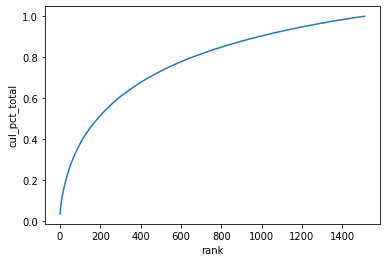

In [8]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [9]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.37983770287141067

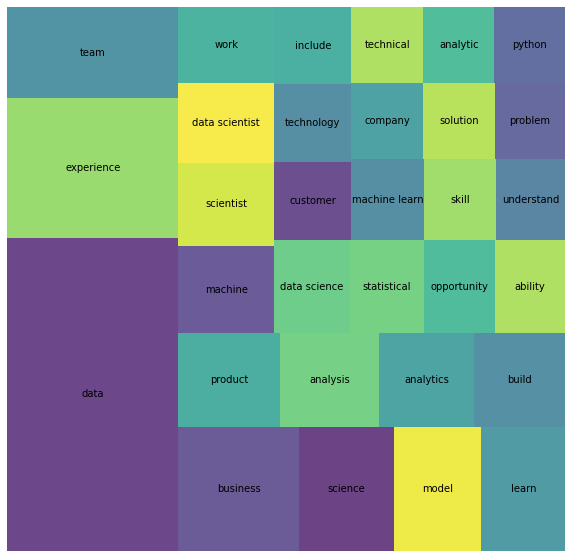

In [10]:
import squarify
import matplotlib.pyplot as plt

wc_top36 = wc[wc['rank'] <= 31]

plt.figure(figsize=(10,10))

squarify.plot(sizes=wc_top36['pct_total'], label=wc_top36['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [11]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        min_df=17,
                       )

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)

features = tfidf.get_feature_names()
#display(len(features), features[:50])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=features)
print(dtm.shape)
dtm.head()


(426, 1511)


,000,10,100,12,2019,40,401,401k,500,600,...,write communication,write verbal,www,year,year experience,year professional,year relevant,years,years experience,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025103,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.037030,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.109697,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [12]:
##### Your Code Here #####


from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

# sample a doc from dtm to use as our query point 
doc = dtm.iloc[0].values

# Query Using kneighbors 
nn.kneighbors([doc])

(array([[0.        , 1.21088956, 1.24959752, 1.25258196, 1.26160022]]),
 array([[  0, 338, 403, 222, 313]]))

In [13]:
jobs_df.text_description[0]

"job requirements:\nconceptual understanding in machine learning models like nai¨ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of them\nintermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)\nexposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in r\nability to communicate model findings to both technical and non-technical stake holders\nhands on experience in sql/hive or similar programming language\nmust show past work via github, kaggle or any other published article\nmaster's degree in statistics/mathematics/computer science or any other quant specific field.\napply now"

In [14]:
jobs_df.text_description[338]

"the fca manufacturing planning and control (mpc) organization is currently seeking a highly skilled, result-oriented data scientist to join our bda (big data & analytics) team at our fca headquarters in auburn hills, michigan. the data scientist position offers the selected candidate an opportunity to be an integral part of a company whose challenge is to use statistical skills, coding experience and domain knowledge to provide key insights to specific problems. this position will develop complex analytic models, ensure actual adoption and value realization of the model, prove the validity of these models and be able to explain his findings to a non-technical audience. the data scientist will drive continuous improvement to the models based on results, feedback, and business requirements changes\n\nthe data scientist will first extract the data from various sources or databases, clean, structure, and understand the data. then the candidate will analyze the data to answer specific busi

In [15]:
def find_job_matches(job_desc):
    def transform(desc):
        token_str = ' '.join(tokenize(desc))
        dtm = tfidf.transform([token_str])
        return dtm.todense().tolist()[0]


    doc = transform(job_desc)

    # Query Using kneighbors 
    nearest = nn.kneighbors([doc])[1].tolist()[0]
    
    nearest_jobs = [jobs_df.text_description[n] for n in nearest]
    
    return nearest_jobs

ideal_job = 'Data Engineer Job Requirements:\n Intermediate to Expert level Experience in Python with the ability to write clean and efficient data manipulation functions\n Knowledge of SQL \n Exposure to packages like pandas,'\
            'numpy, scipy, matplotlib\n Understanding of Machine Learning models.'

closest_matches = find_job_matches(ideal_job)

for idx,match in enumerate(closest_matches):
    print(f'match[{idx}] = {match} \n\n')


match[0] = job requirements:
conceptual understanding in machine learning models like nai¨ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of them
intermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)
exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in r
ability to communicate model findings to both technical and non-technical stake holders
hands on experience in sql/hive or similar programming language
must show past work via github, kaggle or any other published article
master's degree in statistics/mathematics/computer science or any other quant specific field.
apply now 


match[1] = data science encompasses the computational and statistical skills required to use data in support of scientific enquiry and sound business decision-making.

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 